In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('./data'))

['wine_area_grade.csv', 'wine-data_dictionary.csv', 'wine_frequency.csv', 'wine_side.csv', 'wine_raw_data_group.csv', 'wine_quality_white.csv', 'wine_data_preference.csv', 'wine_quality_red.csv', 'wine_area_province.csv', 'wine_data_sales.csv']


In [2]:
data = pd.read_csv('./data/wine_quality_red.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
data.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

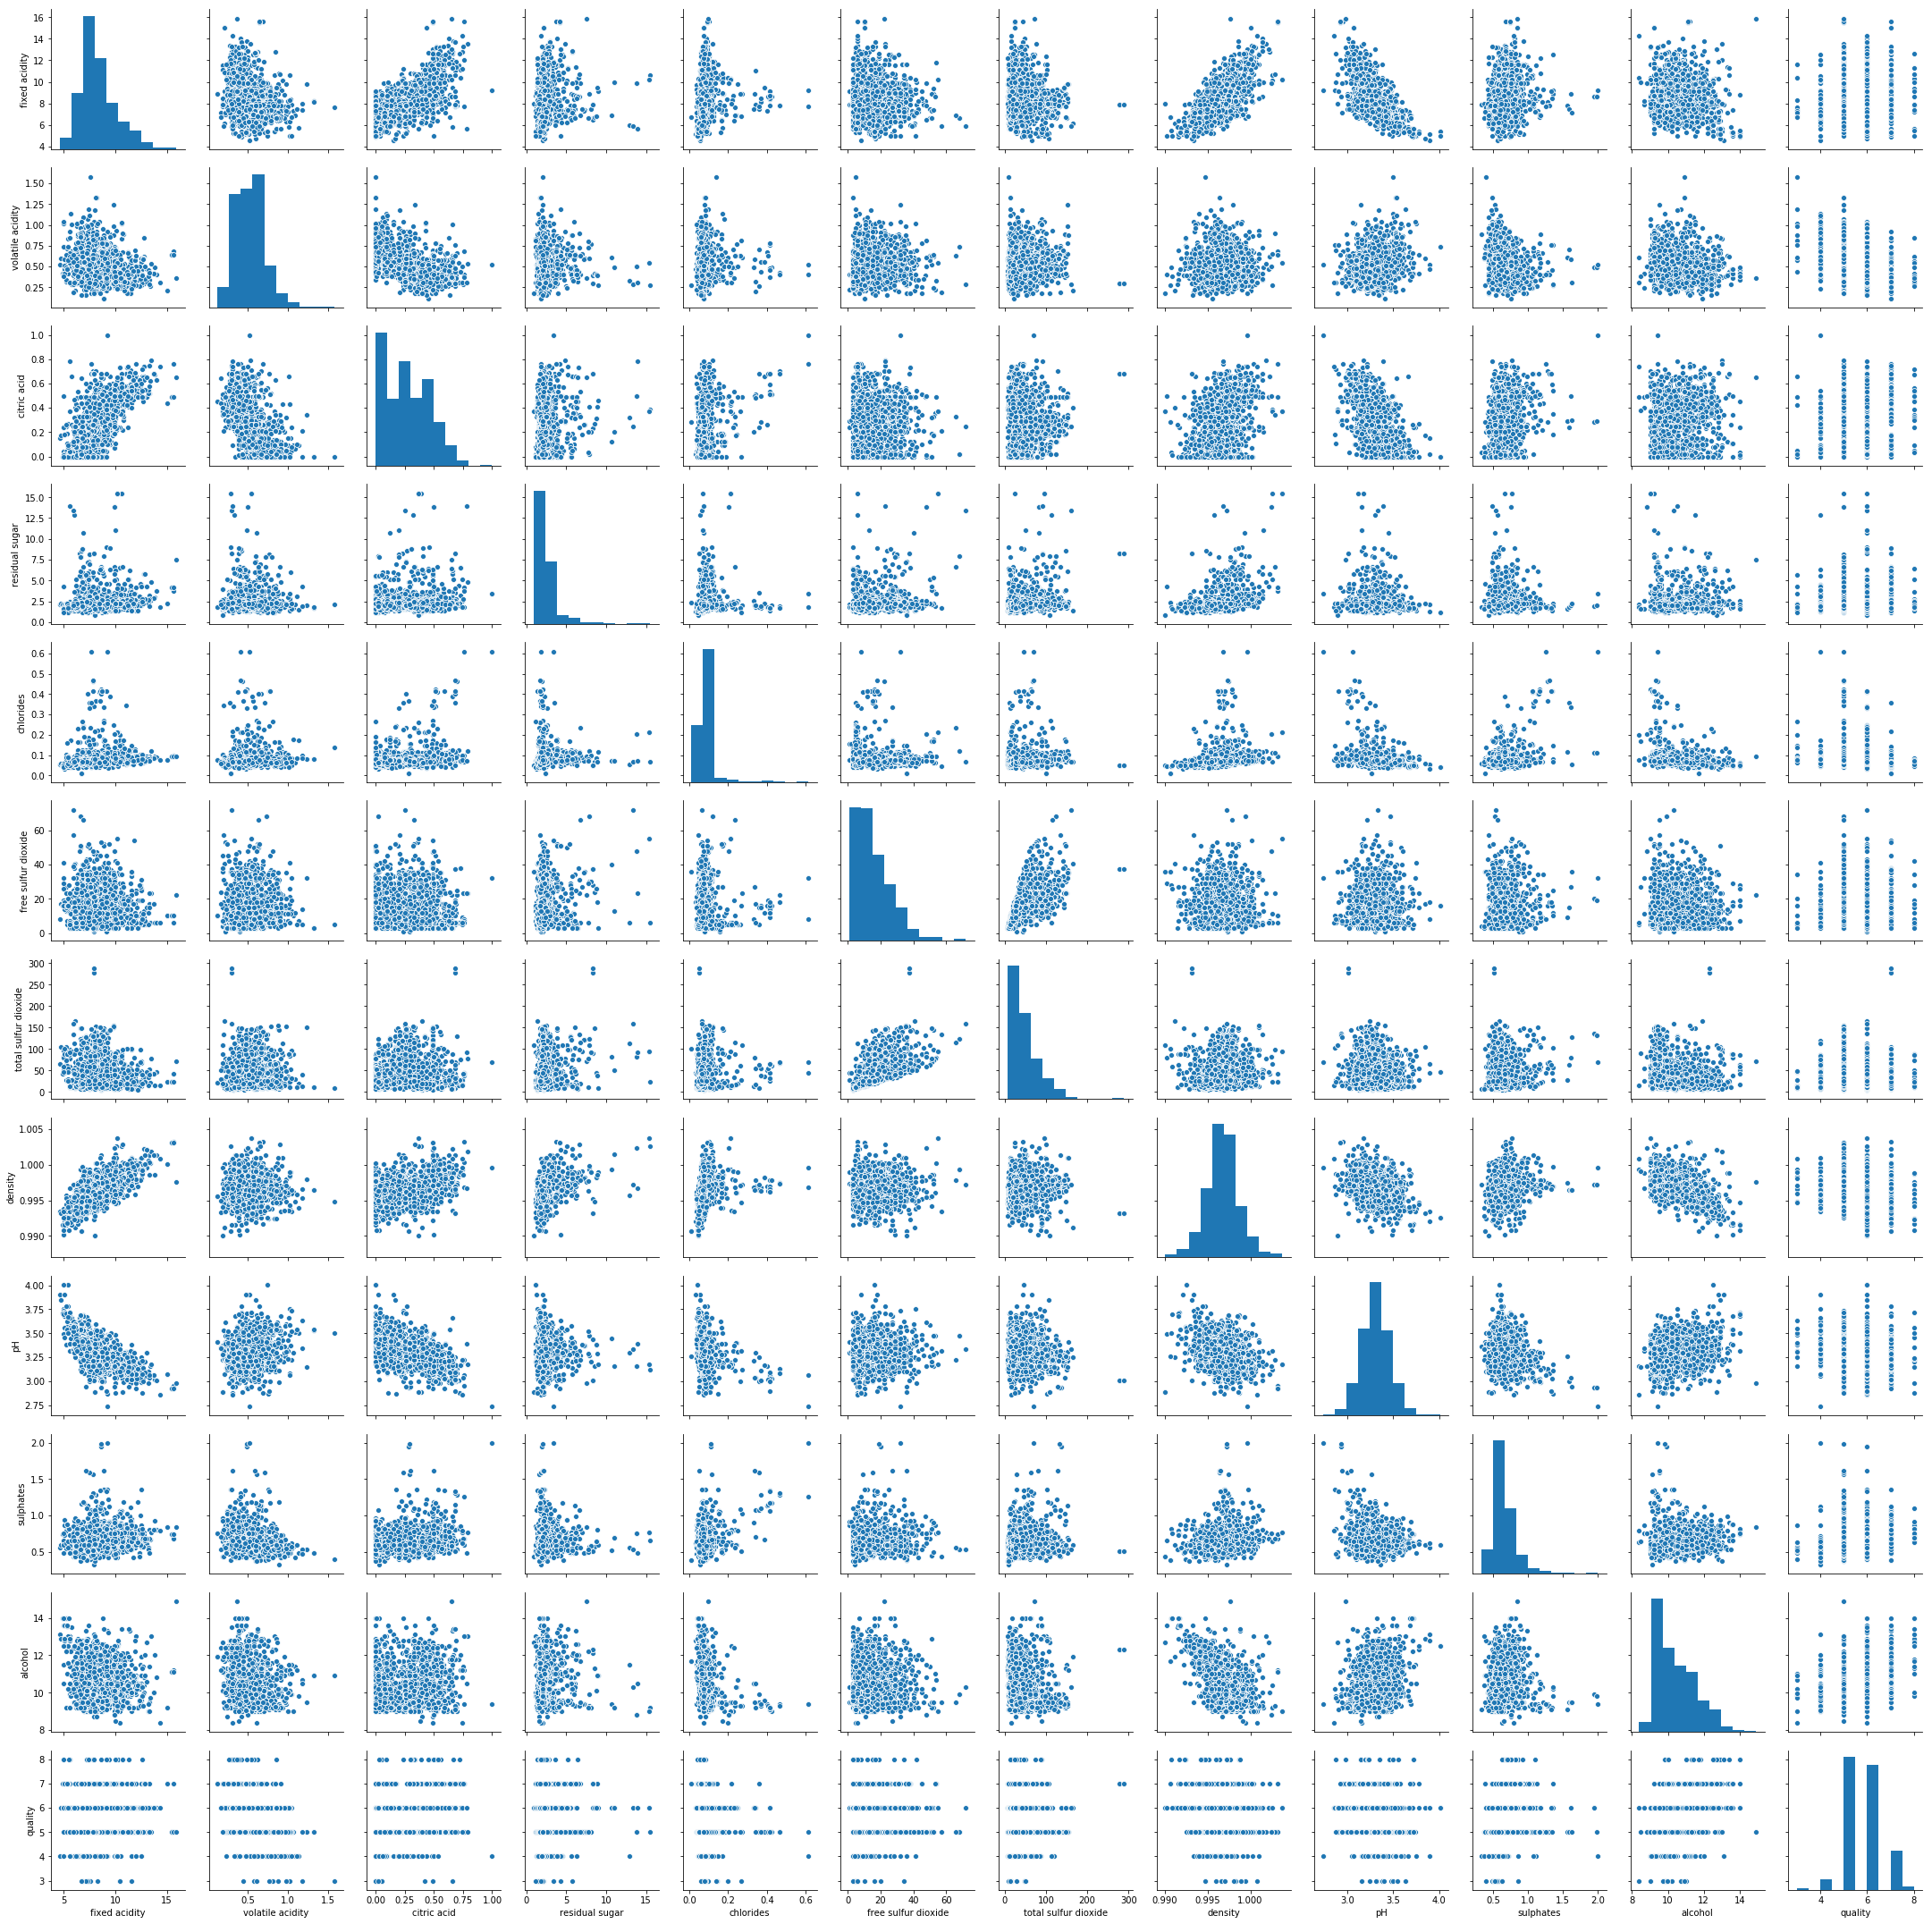

In [7]:
sns.pairplot(data)

In [8]:
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [9]:
sns.countplot(x='quality', data=data)

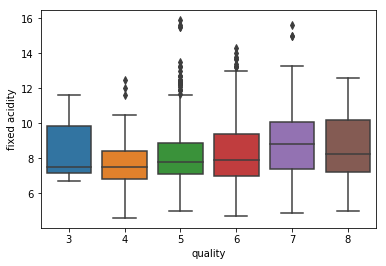

In [10]:
sns.boxplot('quality', 'fixed acidity', data=data)

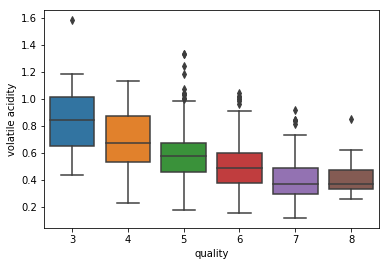

In [11]:
sns.boxplot('quality', 'volatile acidity', data = data)

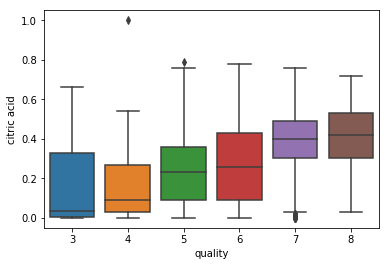

In [12]:
sns.boxplot('quality', 'citric acid', data = data)

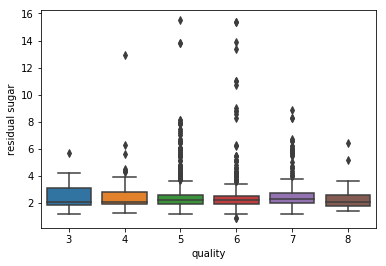

In [13]:
sns.boxplot('quality', 'residual sugar', data = data)


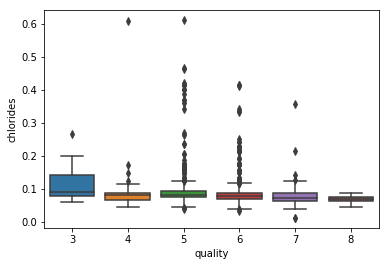

In [14]:
sns.boxplot('quality', 'chlorides', data = data)

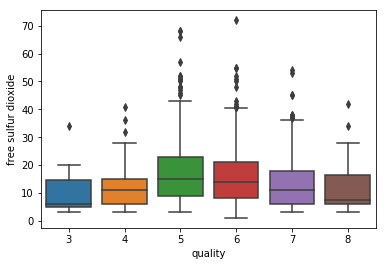

In [15]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

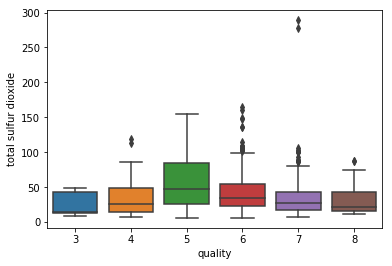

In [16]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

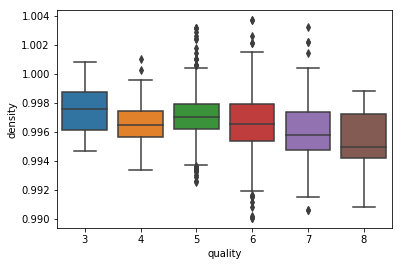

In [17]:
sns.boxplot('quality', 'density', data = data)

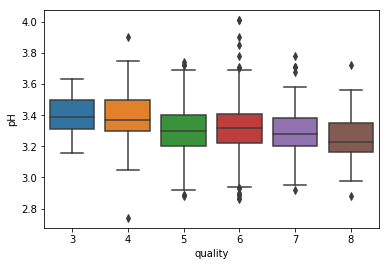

In [18]:
sns.boxplot('quality', 'pH', data = data)

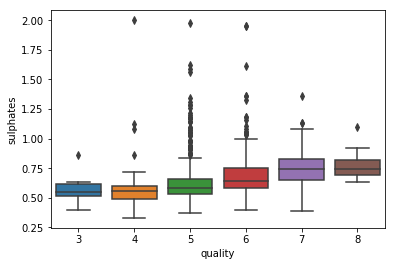

In [19]:
sns.boxplot('quality', 'sulphates', data = data)


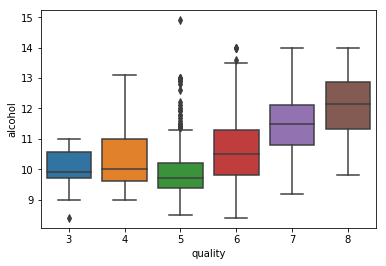

In [20]:
sns.boxplot('quality', 'alcohol', data = data)


In [21]:
data.describe().round(3)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1599.000          1599.000     1599.000        1599.000   
mean           8.320             0.528        0.271           2.539   
std            1.741             0.179        0.195           1.410   
min            4.600             0.120        0.000           0.900   
25%            7.100             0.390        0.090           1.900   
50%            7.900             0.520        0.260           2.200   
75%            9.200             0.640        0.420           2.600   
max           15.900             1.580        1.000          15.500   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   1599.000             1599.000              1599.000  1599.000   
mean       0.087               15.875                46.468     0.997   
std        0.047               10.460                32.895     0.002   
min        0.012                1.000                 6.000     0.990   
25%        0.070                7.000                22.000     0.996   
50%        0.079               14.000                38.000     0.997   
75%        0.090               21.000                62.000     0.998   
max        0.611               72.000               289.000     1.004   

             pH  sulphates   alcohol   quality  
count  1599.000   1599.000  1599.000  1599.000  
mean      3.311      0.658    10.423     5.636  
std       0.154      0.170     1.066     0.808  
min       2.740      0.330     8.400     3.000  
25%       3.210      0.550     9.500     5.000  
50%       3.310      0.620    10.200     6.000  
75%       3.400      0.730    11.100     6.000  
max       4.010      2.000    14.900     8.000

In [22]:
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [24]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [25]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [26]:
x = data.iloc[:,:11]
y = data['Reviews']

In [27]:
x.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
5      9.4  
6      9.4  
7     10.0  
8      9.5  
9     10.5

In [28]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [30]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


### Proceed to perform PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

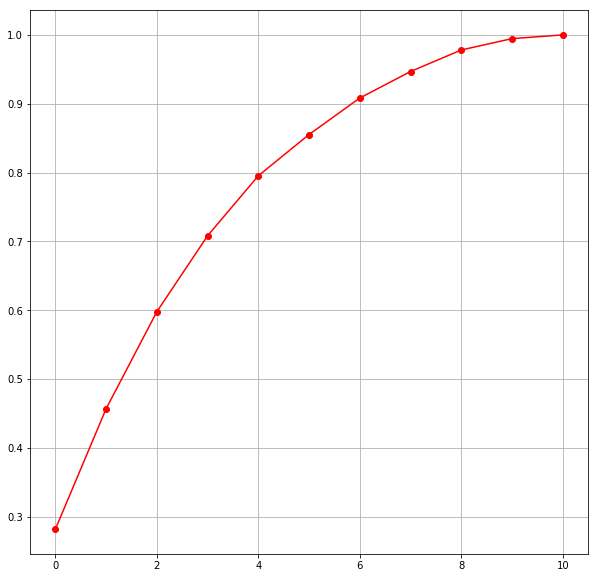

In [32]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

> 8개의 데이터로도 90% 정도의 설명력을 보여준다 그래서 8개의 요소를 선택해서 fit 할꺼임

In [33]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
x_new

array([[-1.61952988,  0.45095009, -1.77445415, ..., -0.91392069,
        -0.16104319, -0.28225828],
       [-0.79916993,  1.85655306, -0.91169017, ...,  0.92971392,
        -1.00982858,  0.76258697],
       [-0.74847909,  0.88203886, -1.17139423, ...,  0.40147313,
        -0.53955348,  0.59794606],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.50640956,
        -0.23108221,  0.07938219],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.86040762,
        -0.32148695, -0.46887589],
       [-0.42697475, -0.53669021,  1.6289552 , ..., -0.49615364,
         1.18913227,  0.04217568]])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 42)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 8)
(1119,)
(480, 8)
(480,)


## Modeling

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. SVM
5. Naive Bayes


## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [37]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   1   0]
 [  0 473   0]
 [  0   6   0]]
98.54166666666667


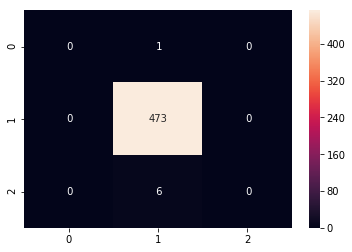

In [38]:
sns.heatmap(lr_conf_matrix, annot=True, fmt='2.0f' )

In [64]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       473
           3       0.00      0.00      0.00         6

   micro avg       0.99      0.99      0.99       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.97      0.99      0.98       480



## DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

In [40]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   1   0]
 [  1 468   4]
 [  0   5   1]]
97.70833333333333


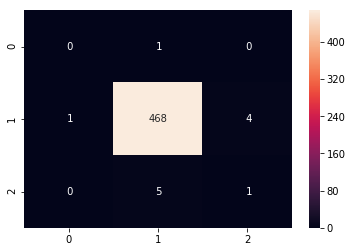

In [41]:
sns.heatmap(dt_conf_matrix, annot=True, fmt='2.0f' )

In [63]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      0.99      0.99       473
           3       0.20      0.17      0.18         6

   micro avg       0.98      0.98      0.98       480
   macro avg       0.40      0.39      0.39       480
weighted avg       0.98      0.98      0.98       480



## RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [43]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print((rf_acc_score*100).round(3))

[[  0   1   0]
 [  0 472   1]
 [  0   5   1]]
98.542


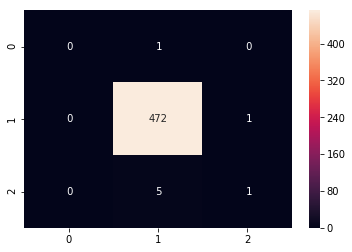

In [44]:
sns.heatmap(rf_conf_matrix, annot=True, fmt='2.0f' )

In [62]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       473
           3       0.50      0.17      0.25         6

   micro avg       0.99      0.99      0.99       480
   macro avg       0.50      0.39      0.41       480
weighted avg       0.98      0.99      0.98       480



## NaiveBayes

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [46]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[  0   1   0]
 [  7 466   0]
 [  0   6   0]]
97.08333333333333


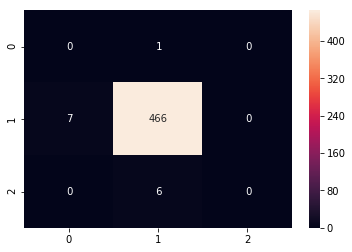

In [47]:
sns.heatmap(nb_conf_matrix, annot=True, fmt='2.0f' )

In [61]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      0.99      0.99       473
           3       0.00      0.00      0.00         6

   micro avg       0.97      0.97      0.97       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.97      0.97      0.97       480



## SVM(linear, default)

In [48]:
from sklearn.svm import SVC

In [49]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [50]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc)
lin_svc_acc_score = accuracy_score(y_test, lin_svc)
print(lin_svc_conf_matrix)
print((lin_svc_acc_score*100).round(3))

[[  0   1   0]
 [  0 472   1]
 [  0   5   1]]
98.542


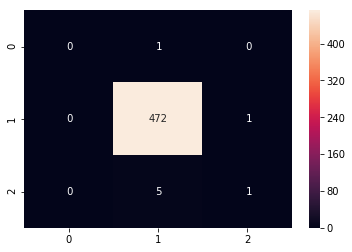

In [51]:
sns.heatmap(lin_svc_conf_matrix, annot=True, fmt='2.0f' )

In [60]:
print(classification_report(y_test, lin_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       473
           3       0.50      0.17      0.25         6

   micro avg       0.99      0.99      0.99       480
   macro avg       0.50      0.39      0.41       480
weighted avg       0.98      0.99      0.98       480



In [52]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)

In [53]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rbf_svc)
rbf_svc_acc_score = accuracy_score(y_test, rbf_svc)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[  0   1   0]
 [  0 472   1]
 [  0   5   1]]
98.54166666666667


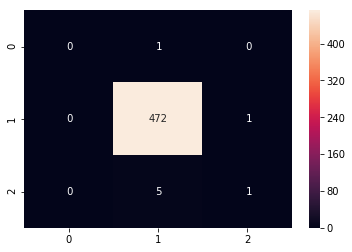

In [54]:
sns.heatmap(rbf_svc_conf_matrix, annot=True, fmt='2.0f' )

In [59]:
print(classification_report(y_test, rbf_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       473
           3       0.50      0.17      0.25         6

   micro avg       0.99      0.99      0.99       480
   macro avg       0.50      0.39      0.41       480
weighted avg       0.98      0.99      0.98       480



---

In [55]:
mymodel = []
mymodel.append(('LogReg', LogisticRegression()))
mymodel.append(('KNN', KNeighborsClassifier()))
mymodel.append(('DeciTree', DecisionTreeClassifier()))
mymodel.append(('RandForest', RandomForestClassifier()))
mymodel.append(('SVM', SVC()))
mymodel.append(('XGBoost', XGBClassifier()))

In [74]:
All_model_result = []
All_model_name = []
for algoname, algorithm in mymodel:    
    kfoldFn = KFold(random_state = 42)
    Eval_result = cross_val_score(algorithm, x_train, y_train, cv = kfoldFn, scoring = 'accuracy')
    print(type(Eval_result))
    print(Eval_result)
    
    All_model_result.append(Eval_result)
    All_model_name.append(algoname)
    print("\nModelname and Model Accuracy:", algoname, (100*Eval_result.mean()).round(4),"%")
    print("Modelname and Model Std:", algoname, (100*Eval_result.std()).round(4))
#     print(classification_report(y_test, Eval_result))

<class 'numpy.ndarray'>
[0.97855228 0.98123324 0.98391421]

Modelname and Model Accuracy: LogReg 98.1233 %
Modelname and Model Std: LogReg 0.2189
<class 'numpy.ndarray'>
[0.97855228 0.98123324 0.98123324]

Modelname and Model Accuracy: KNN 98.034 %
Modelname and Model Std: KNN 0.1264
<class 'numpy.ndarray'>
[0.95978552 0.97319035 0.95710456]

Modelname and Model Accuracy: DeciTree 96.336 %
Modelname and Model Std: DeciTree 0.7037
<class 'numpy.ndarray'>
[0.98123324 0.97855228 0.98391421]

Modelname and Model Accuracy: RandForest 98.1233 %
Modelname and Model Std: RandForest 0.2189
<class 'numpy.ndarray'>
[0.97855228 0.98123324 0.98391421]

Modelname and Model Accuracy: SVM 98.1233 %
Modelname and Model Std: SVM 0.2189
<class 'numpy.ndarray'>
[0.97855228 0.98391421 0.98391421]

Modelname and Model Accuracy: XGBoost 98.2127 %
Modelname and Model Std: XGBoost 0.2528
